In [ ]:
#Import Section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import statistics
df = pd.read_csv('longbeachva_ds.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,10,60,2,1,12,3,11,3,1,1,3
1,44,1,4,3,19,2,1,8,2,14,1,1,1,1
2,60,1,4,5,27,2,1,19,3,6,4,1,1,3
3,55,1,4,11,39,2,1,25,3,10,2,1,1,2
4,66,1,3,33,22,3,2,53,3,5,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,41,95,3,1,29,2,14,1,1,1,2
196,62,1,1,1,30,2,1,1,1,1,1,1,1,1
197,55,1,4,37,33,3,1,4,2,14,1,1,3,3
198,58,1,4,1,3,3,2,1,1,1,1,1,1,1


In [ ]:

df['target'] = np.where(df['target'] > 1, 1, np.where(df['target'] == 1, 0, df['target']))
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,10,60,2,1,12,3,11,3,1,1,1
1,44,1,4,3,19,2,1,8,2,14,1,1,1,0
2,60,1,4,5,27,2,1,19,3,6,4,1,1,1
3,55,1,4,11,39,2,1,25,3,10,2,1,1,1
4,66,1,3,33,22,3,2,53,3,5,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,41,95,3,1,29,2,14,1,1,1,1
196,62,1,1,1,30,2,1,1,1,1,1,1,1,0
197,55,1,4,37,33,3,1,4,2,14,1,1,3,1
198,58,1,4,1,3,3,2,1,1,1,1,1,1,0


In [ ]:
#splitting into features and class label

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('target',axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 23)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m1 = 'knn classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_fold, y_train_fold)
    knnpred = knn.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, knnpred)
    fold_accuracy = accuracy_score(y_test_fold, knnpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

knnaccuracy = total_accuracy / k
print("Mean Accuracy =", knnaccuracy)

Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 2 15]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 1 14]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 1 15]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 2 15]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 0  1]
 [ 2 17]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[2 7]
 [2 9]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[ 1  9]
 [ 0 10]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 0  7]
 [ 0 13]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  6]
 [ 0 14]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 17]]
Mean Accuracy = 71.5


Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m2 = 'lr classifier'


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    lr = LogisticRegression()
    lr.fit(X_train_fold,y_train_fold)
    lrpred = lr.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, lrpred)
    fold_accuracy = accuracy_score(y_test_fold, lrpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

lraccuracy = total_accuracy / k
print("Mean Accuracy =", lraccuracy)

Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 17]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[ 1  4]
 [ 5 10]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 0 16]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 2 15]]
Accuracy for this fold: 95.0
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 19]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[ 0  9]
 [ 1 10]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[ 0 10]
 [ 0 10]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 1  6]
 [ 0 13]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  5]
 [ 0 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 1 16]]
Mean Accuracy = 72.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVM

In [ ]:
#SVM
m3 = 'svm classifier'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    Svm = SVC(kernel = 'linear',C=2,probability=True)
    Svm.fit(X_train_fold,y_train_fold)
    Svmpred = Svm.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, Svmpred)
    fold_accuracy = accuracy_score(y_test_fold, Svmpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

svmaccuracy = total_accuracy / k
print("Mean Accuracy =", svmaccuracy)

Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 2  3]
 [ 4 11]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  6]
 [ 0 14]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  5]
 [ 1 14]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 2 15]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 1 15]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[ 0  9]
 [ 1 10]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  5]
 [ 0 15]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  6]
 [ 0 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 0 16]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 1 15]]
Mean Accuracy = 70.5


Gaussian NB

In [ ]:
#GaussianNB

m5 = 'gaussian nb'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    nb = GaussianNB()
    nb.fit(X_train_fold,y_train_fold)
    nbpred = nb.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, nbpred)
    fold_accuracy = accuracy_score(y_test_fold, nbpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

nbaccuracy = total_accuracy / k
print("Mean Accuracy =", nbaccuracy)

Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 2  3]
 [ 1 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 2  4]
 [ 0 14]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 1 14]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 1  2]
 [ 4 13]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 1 15]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 3  6]
 [ 1 10]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 1 14]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 1  5]
 [ 2 12]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 0 16]]
Accuracy for this fold: 20.0
Confusion Matrix for Fold:
[[ 3  1]
 [15  1]]
Mean Accuracy = 69.5


Decision Tree

In [ ]:
#DT
m4 = 'decision tree'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=6)
    dt.fit(X_train_fold,y_train_fold)
    dtpred = dt.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, dtpred)
    fold_accuracy = accuracy_score(y_test_fold, dtpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

dtaccuracy = total_accuracy / k
print("Mean Accuracy =", dtaccuracy)

Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 3 12]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 2  4]
 [ 1 13]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[1 4]
 [6 9]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[ 0  3]
 [ 6 11]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 3 13]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[2 7]
 [2 9]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 0  5]
 [ 2 13]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  6]
 [ 0 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 2  2]
 [ 2 14]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 2 14]]
Mean Accuracy = 66.0


QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m6 = 'qda classifier'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_fold, y_train_fold)
    qdapred = qda.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, qdapred)
    fold_accuracy = accuracy_score(y_test_fold, qdapred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

qdaaccuracy = total_accuracy / k
print("Mean Accuracy =", qdaaccuracy)


Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 2  3]
 [ 2 13]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 2  4]
 [ 0 14]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 0  5]
 [ 0 15]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  2]
 [ 3 14]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 2 14]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[5 4]
 [2 9]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 1 14]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 2  4]
 [ 2 12]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 3 13]]
Accuracy for this fold: 20.0
Confusion Matrix for Fold:
[[ 4  0]
 [16  0]]
Mean Accuracy = 68.0


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** 

Random Forest (BAGGING)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
m7 = 'rf classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=5, random_state=23,max_depth=4)
    rf.fit(X_train_fold, y_train_fold)
    rfpred = rf.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, rfpred)
    fold_accuracy = accuracy_score(y_test_fold, rfpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

rfaccuracy = total_accuracy / k
print("Mean Accuracy =", rfaccuracy)

Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 1  2]
 [ 1 16]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 0  5]
 [ 2 13]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 1  3]
 [ 2 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 1 16]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 0  1]
 [ 2 17]]
Accuracy for this fold: 60.0
Confusion Matrix for Fold:
[[ 1  8]
 [ 0 11]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[ 1  9]
 [ 0 10]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 3  4]
 [ 1 12]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 0  6]
 [ 0 14]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 1  2]
 [ 1 16]]
Mean Accuracy = 73.5


ADABOOST (BOOSTING)

In [ ]:
m8 = 'adaboost classifier'
from sklearn.ensemble import AdaBoostClassifier
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    base_classifier = DecisionTreeClassifier(max_depth=6)
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=23)
    adaboost_classifier.fit(X_train_fold, y_train_fold)
    boostpred = adaboost_classifier.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, boostpred)
    fold_accuracy = accuracy_score(y_test_fold, boostpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

boostaccuracy = total_accuracy / k
print("Mean Accuracy =", boostaccuracy)

Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 2  3]
 [ 2 13]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[ 1  5]
 [ 1 13]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 3 12]]
Accuracy for this fold: 60.0
Confusion Matrix for Fold:
[[ 0  3]
 [ 5 12]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 0  4]
 [ 3 13]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[ 4  5]
 [ 0 11]]
Accuracy for this fold: 65.0
Confusion Matrix for Fold:
[[ 1  4]
 [ 3 12]]
Accuracy for this fold: 55.00000000000001
Confusion Matrix for Fold:
[[ 0  6]
 [ 3 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[ 3  1]
 [ 3 13]]
Accuracy for this fold: 85.0
Confusion Matrix for Fold:
[[ 2  2]
 [ 1 15]]
Mean Accuracy = 69.5


DeepLearning Model

In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_layer = Input(shape=(X_train.shape[1],))
d1 = Dense(units=100, activation='relu')(input_layer)
d2 = Dense(units=100, activation='relu')(d1)
d3 = Dense(units=100, activation='relu')(d2)
d4 = Dense(units=100, activation='relu')(d3)
# d5 = Dense(units=100, activation='relu')(d4)
# d6 = Dense(units=100, activation='relu')(d5)
# d7 = Dense(units=100, activation='relu')(d6)
# d8 = Dense(units=100, activation='relu')(d7)
# d9 = Dense(units=100, activation='relu')(d8)
output_layer = Dense(units=1, activation='sigmoid')(d4)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with metrics and optimizer
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="Sensitivity"),
             tf.keras.metrics.SpecificityAtSensitivity(0.5, name="Specificity"),
             tfa.metrics.F1Score(num_classes=1, threshold=0.5)],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
)

# Train the model
model.fit(x=X_train, y=y_train, batch_size=2, epochs=120)

# Evaluate the model on the test data
test_loss, test_accuracy, sensitivity, specificity, f1_score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("x=" + str(list(map('{:.2f}%'.format,f1_score))))


Epoch 1/120
80/80 [==============================] - 2s 4ms/step - loss: 0.6956 - accuracy: 0.5437 - Sensitivity: 0.5250 - Specificity: 0.5750 - f1_score: 0.6332
Epoch 2/120
80/80 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6375 - Sensitivity: 0.7083 - Specificity: 0.5750 - f1_score: 0.7456
Epoch 3/120
80/80 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.6750 - Sensitivity: 0.8333 - Specificity: 0.6000 - f1_score: 0.7937
Epoch 4/120
80/80 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.7063 - Sensitivity: 0.9250 - Specificity: 0.5750 - f1_score: 0.8253
Epoch 5/120
80/80 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.7375 - Sensitivity: 0.9750 - Specificity: 0.6000 - f1_score: 0.8478
Epoch 6/120
80/80 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7500 - Sensitivity: 0.9917 - Specificity: 0.6250 - f1_score: 0.8561
Epoch 7/120
80/80 [=========

2/2 [==============================] - 0s 14ms/step - loss: 0.5942 - accuracy: 0.7500 - Sensitivity: 0.9655 - Specificity: 0.8182 - f1_score: 0.8485
Test Accuracy: 75.00%
Sensitivity (Recall): 0.97
Specificity: 0.82
x=['0.85%']


In [ ]:
print("IN LONG BEACH VA DATASET")
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest','adaboost classifier', 'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine','Deep Learning Model ']
accuracy_scores = [lraccuracy,nbaccuracy,rfaccuracy,boostaccuracy,knnaccuracy,dtaccuracy,svmaccuracy,test_accuracy*100]
model_ev = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
model_ev

IN LONG BEACH VA DATASET


,Model,Accuracy
0,Logistic Regression,72.0
1,Naive Bayes,69.5
2,Random Forest,73.5
3,adaboost classifier,69.5
4,K-Nearest Neighbour,71.5
5,Decision Tree,66.0
6,Support Vector Machine,70.5
7,Deep Learning Model,75.0


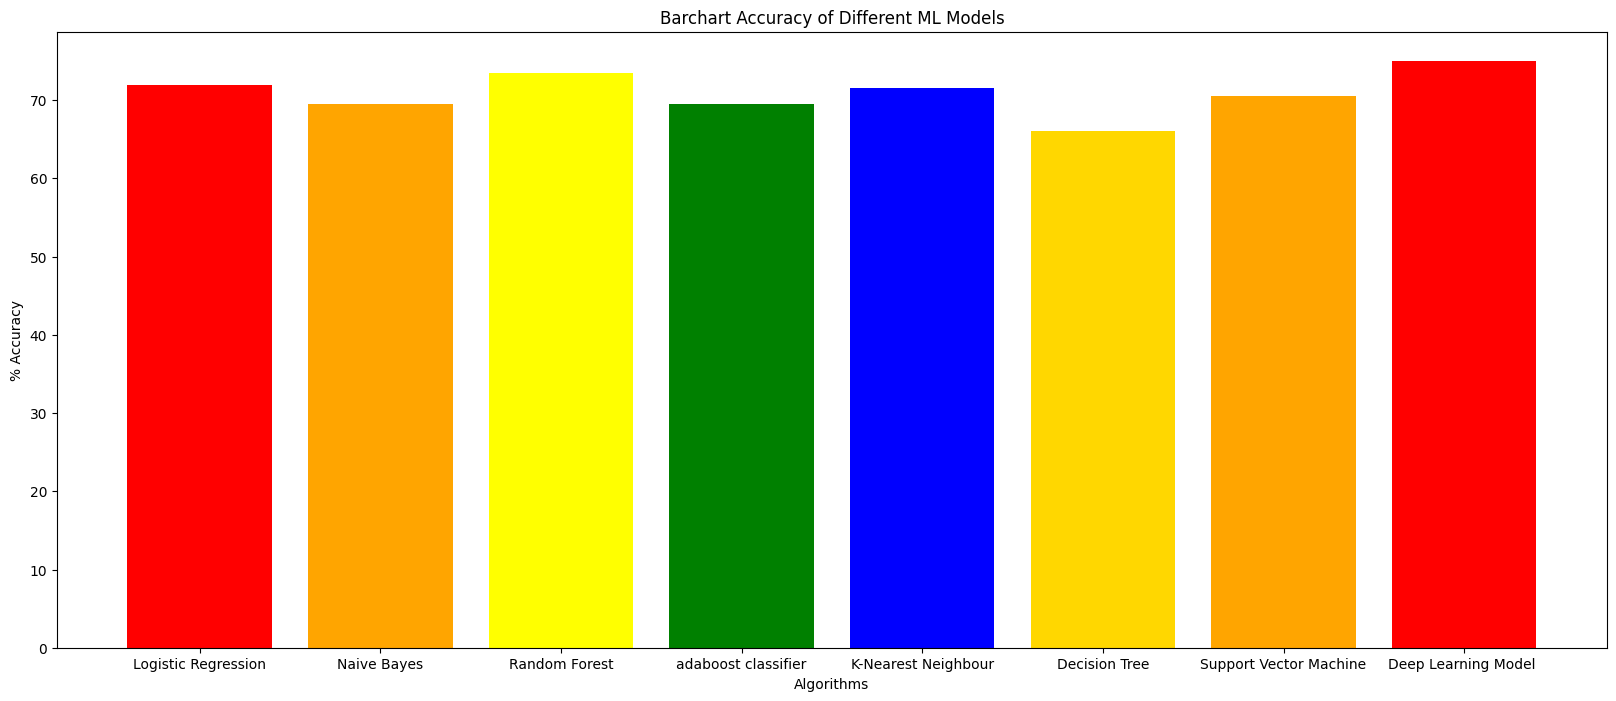

In [ ]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'gold', 'orange', ]
plt.figure(figsize=(20,8))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev ['Model'], model_ev['Accuracy'], color = colors)
plt.show()